<a href="https://colab.research.google.com/github/lompas10/MathStat_course_from_MIREA/blob/main/3/stats_PR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [322]:
from scipy.stats import chisquare

In [323]:
from scipy import stats

In [324]:
data_1 = pd.read_csv('1.txt', names=['x'], header=None)
data_2 = pd.read_csv('2.txt', names=['x'], header=None)
data_3 = pd.read_csv('3.txt', names=['x'], header=None)
data_4 = pd.read_csv('4.txt', names=['x'], header=None)
data_5 = pd.read_csv('5.txt', names=['x'], header=None)
data_6 = pd.read_csv('6.txt', names=['x'], header=None)


data = {}

for i in range(1, 7):
    data[i] = np.loadtxt(f'{i}.txt')

In [325]:
datas = [data_1, data_2, data_3, data_4, data_5, data_6]

In [326]:
def find_dist(x, type = 'norm'):
    if (type == 'norm'):
        std = np.std(x)
        a = np.mean(x)
        dist = stats.norm(loc = a, scale = std)
        return ('norm', a, std, dist)
    
    if (type == 'uniform'):
        b =(3)**0.5*np.std(x)+np.mean(x)
        a = 2*np.mean(x)-b
        dist = stats.uniform(loc = a, scale = b-a)
        return ('uniform', a, b, dist)
    
    if (type == 'expon'):
        dist = stats.expon(scale = np.std(x))
        return ('expon', None, 1/np.std(x), dist)
    return None

<font color='Red' size=6> *0. Визуализация данных*

In [327]:
def sturges(data):
  N = len(data)
  return int(np.floor(1 + 3.322*np.log10(N)))

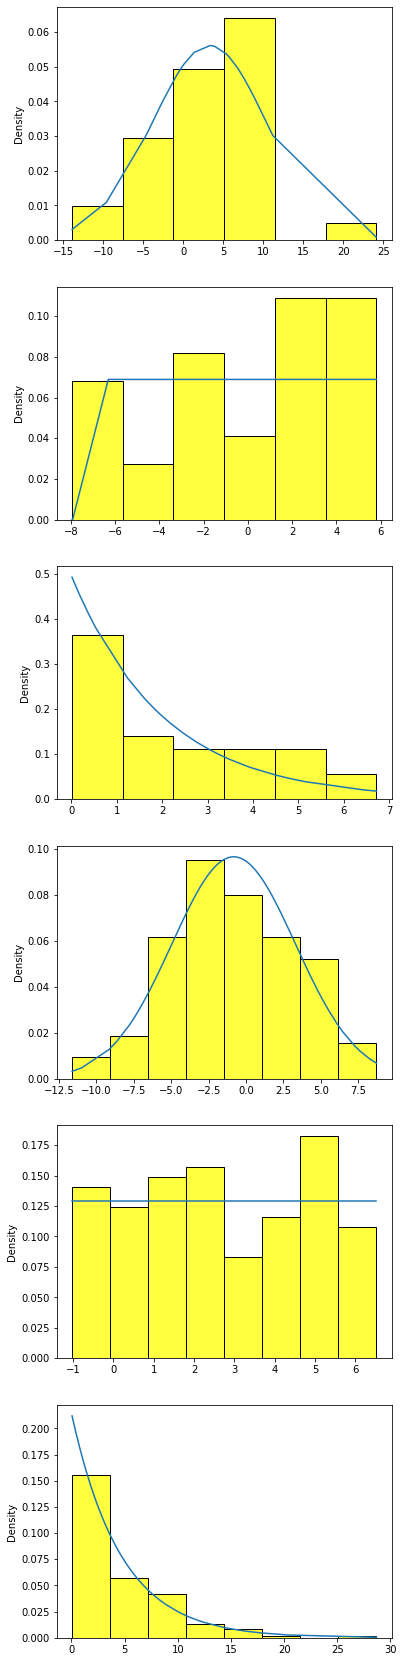

In [328]:
fig, axes = plt.subplots(6, 1, figsize=(6,30))
for i in data:
    sns.histplot(x = data[i], bins = sturges(data[i]), stat = 'density', ax=axes[i-1], color='yellow')
    sns.lineplot(x = data[i],
                 y = find_dist(data[i], ('norm', 'uniform', 'expon')[(i-1)%3])[3].pdf(data[i]),
                 ax=axes[i-1])

<font color='Red' size=6> *1. Проверка гипотез о распределениях с помощью критерия согласия Пирсона*

In [329]:
dict_laplas = {}
for A, B in zip(np.arange(-30, 30, 0.01), stats.norm.cdf(np.arange(-30, 30, 0.01)) - 0.5):
    dict_laplas[A] = B

In [330]:
chi_crit = {
    3:7.814727903,
    4:9.487729037,
    5:11.07049769,
    6:12.59158724,
    7: 14.0567
}

In [331]:
def roundingkeys_toTwoDeci(d):
  for key in list(d):
    new_key = round(key, 2)
    d[new_key] = d[key]
    del d[key]
  return d

In [332]:
laplas = roundingkeys_toTwoDeci(dict_laplas)

In [333]:
def laplas_table_value(x):
  return laplas[round(x, 2)]

In [334]:
def exponential(x, lamb):
  if x >=0:
    return 1 - np.exp(-(lamb * x))
  else: 
    return 0

In [335]:
def uniform(x, a, b):
  if x < a:
    return 0
  elif a < x < b:
    return (x-a) / (b-a)
  elif x > b:
    return 1

In [336]:
def theor_freq(data):
  data = data['x']
  data = (data - np.mean(data)) / np.std(data)
  num_of_intervals = sturges(data)
  grouped_data = pd.Series(pd.cut(data, int(num_of_intervals)))
  data_reduced = pd.DataFrame({'emp_freq' : grouped_data.value_counts()}).reset_index().sort_values('index') 

  theor_freqs = []
  x_i = []


  for interval in data_reduced['index']:
    theor_freqs.append((laplas_table_value(interval.right) - laplas_table_value(interval.left)) * len(data))

  data_reduced['theor_freq'] = theor_freqs 


  return (data_reduced['emp_freq'], data_reduced['theor_freq']) 

In [337]:
for i in range(len(datas)):
  if stats.chisquare(theor_freq(datas[i])[0], theor_freq(datas[i])[1])[0] < chi_crit[len(theor_freq(datas[i])[1]) - 2]:
    print(f'Файл {i+1}:\n Хи-квадрат Пирсона: {stats.chisquare(theor_freq(datas[i])[0], theor_freq(datas[i])[1])[0]}\n Критическое значение Хи-квадрат Пирсона: {chi_crit[len(theor_freq(datas[i])[1]) - 2]}\nПринимаем гипотезу о нормальном распределении генеральной совокупности.\n-----------------------------------------------------------------------------------------------------------------')
  else:
    print(f'Файл {i+1}:\n Хи-квадрат Пирсона: {stats.chisquare(theor_freq(datas[i])[0], theor_freq(datas[i])[1])[0]}\n Критическое значение Хи-квадрат Пирсона: {chi_crit[len(theor_freq(datas[i])[1]) - 2]}\nОтклоняем гипотезу о нормальном распределении генеральной совокупности.\n-----------------------------------------------------------------------------------------------------------------')

Файл 1:
 Хи-квадрат Пирсона: 5.80616865230802
 Критическое значение Хи-квадрат Пирсона: 9.487729037
Принимаем гипотезу о нормальном распределении генеральной совокупности.
-----------------------------------------------------------------------------------------------------------------
Файл 2:
 Хи-квадрат Пирсона: 13.460122223208751
 Критическое значение Хи-квадрат Пирсона: 9.487729037
Отклоняем гипотезу о нормальном распределении генеральной совокупности.
-----------------------------------------------------------------------------------------------------------------
Файл 3:
 Хи-квадрат Пирсона: 15.232020930783616
 Критическое значение Хи-квадрат Пирсона: 9.487729037
Отклоняем гипотезу о нормальном распределении генеральной совокупности.
-----------------------------------------------------------------------------------------------------------------
Файл 4:
 Хи-квадрат Пирсона: 4.390610687946528
 Критическое значение Хи-квадрат Пирсона: 12.59158724
Принимаем гипотезу о нормальном распр

In [338]:
def theor_freq_exp(data):
  data = data['x']
  #data = (data - np.mean(data)) / np.std(data)
  num_of_intervals = sturges(data)
  grouped_data = pd.Series(pd.cut(data, int(num_of_intervals)))
  data_reduced = pd.DataFrame({'emp_freq' : grouped_data.value_counts()}).reset_index().sort_values('index') 
  


  theor_freqs = []

  lamb = 1 / np.mean(data)

  for interval in data_reduced['index']:
    theor_freqs.append((exponential(interval.right, lamb) - exponential(interval.left, lamb)) * len(data))

  data_reduced['theor_freq'] = theor_freqs


  return (data_reduced['emp_freq'], data_reduced['theor_freq']) 

In [339]:
for i in range(len(datas)):
  if stats.chisquare(theor_freq_exp(datas[i])[0], theor_freq_exp(datas[i])[1])[0] < chi_crit[len(theor_freq_exp(datas[i])[1]) - 1]:
    print(f'Файл {i+1}:\n Хи-квадрат Пирсона: {stats.chisquare(theor_freq_exp(datas[i])[0], theor_freq_exp(datas[i])[1])[0]}\n Критическое значение Хи-квадрат Пирсона: {chi_crit[len(theor_freq_exp(datas[i])[1]) - 2]}\nПринимаем гипотезу о показательном распределении генеральной совокупности.\n-----------------------------------------------------------------------------------------------------------------')
  else:
    print(f'Файл {i+1}:\n Хи-квадрат Пирсона: {stats.chisquare(theor_freq_exp(datas[i])[0], theor_freq_exp(datas[i])[1])[0]}\n Критическое значение Хи-квадрат Пирсона: {chi_crit[len(theor_freq_exp(datas[i])[1]) - 2]}\nОтклоняем гипотезу о показательном распределении генеральной совокупности.\n-----------------------------------------------------------------------------------------------------------------')

Файл 1:
 Хи-квадрат Пирсона: inf
 Критическое значение Хи-квадрат Пирсона: 9.487729037
Отклоняем гипотезу о показательном распределении генеральной совокупности.
-----------------------------------------------------------------------------------------------------------------
Файл 2:
 Хи-квадрат Пирсона: inf
 Критическое значение Хи-квадрат Пирсона: 9.487729037
Отклоняем гипотезу о показательном распределении генеральной совокупности.
-----------------------------------------------------------------------------------------------------------------
Файл 3:
 Хи-квадрат Пирсона: 5.7708600192312725
 Критическое значение Хи-квадрат Пирсона: 9.487729037
Принимаем гипотезу о показательном распределении генеральной совокупности.
-----------------------------------------------------------------------------------------------------------------
Файл 4:
 Хи-квадрат Пирсона: inf
 Критическое значение Хи-квадрат Пирсона: 12.59158724
Отклоняем гипотезу о показательном распределении генеральной совокупно

In [340]:
def theor_freq_uni(data):
  data = (data['x'])

  num_of_intervals = sturges(data)
  grouped_data = pd.Series(pd.cut(data, int(num_of_intervals)))
  data_reduced = pd.DataFrame({'emp_freq' : grouped_data.value_counts()}).reset_index().sort_values('index') 

  a = np.mean(data) - np.sqrt(3) * np.std(data)
  b = np.mean(data) + np.sqrt(3) * np.std(data)

  f = 1 / (b - a)

  theor_freqs = []

  for interval in data_reduced['index']:
    theor_freqs.append((uniform(interval.right, a, b) - uniform(interval.left, a, b)) * len(data))

  data_reduced['theor_freq'] = theor_freqs 


  return (data_reduced['emp_freq'], data_reduced['theor_freq']) 

In [341]:
for i in range(len(datas)):
  if stats.chisquare(theor_freq_uni(datas[i])[0], theor_freq_uni(datas[i])[1])[0] < chi_crit[len(theor_freq_uni(datas[i])[1]) - 2]:
    print(f'Файл {i+1}:\n Хи-квадрат Пирсона: {stats.chisquare(theor_freq_uni(datas[i])[0], theor_freq_uni(datas[i])[1])[0]}\n Критическое значение Хи-квадрат Пирсона: {chi_crit[len(theor_freq_uni(datas[i])[1]) - 2]}\nПринимаем гипотезу о равномерном распределении генеральной совокупности.\n-----------------------------------------------------------------------------------------------------------------')
  else:
    print(f'Файл {i+1}:\n Хи-квадрат Пирсона: {stats.chisquare(theor_freq_uni(datas[i])[0], theor_freq_uni(datas[i])[1])[0]}\n Критическое значение Хи-квадрат Пирсона: {chi_crit[len(theor_freq_uni(datas[i])[1]) - 2]}\nОтклоняем гипотезу о равномерном распределении генеральной совокупности.\n-----------------------------------------------------------------------------------------------------------------')

Файл 1:
 Хи-квадрат Пирсона: inf
 Критическое значение Хи-квадрат Пирсона: 9.487729037
Отклоняем гипотезу о равномерном распределении генеральной совокупности.
-----------------------------------------------------------------------------------------------------------------
Файл 2:
 Хи-квадрат Пирсона: 7.4184576385536865
 Критическое значение Хи-квадрат Пирсона: 9.487729037
Принимаем гипотезу о равномерном распределении генеральной совокупности.
-----------------------------------------------------------------------------------------------------------------
Файл 3:
 Хи-квадрат Пирсона: 17.695338399749396
 Критическое значение Хи-квадрат Пирсона: 9.487729037
Отклоняем гипотезу о равномерном распределении генеральной совокупности.
-----------------------------------------------------------------------------------------------------------------
Файл 4:
 Хи-квадрат Пирсона: inf
 Критическое значение Хи-квадрат Пирсона: 12.59158724
Отклоняем гипотезу о равномерном распределении генеральной со

<font color='red' size=6>*2. Проверка гипотез о распределении генеральной совокупности с помощью анаморфоз.*

In [342]:
def gaussian_anamorphose(data):
  data = data['x']
  a = np.mean(data)
  sigma = np.std(data)
  num_of_intervals = sturges(data) - 2
  grouped_data = pd.Series(pd.cut(data, int(num_of_intervals)))
  data_reduced = pd.DataFrame({'emp_freq' : grouped_data.value_counts()}).reset_index().sort_values('index')
  
  x_i = []

  for interval in data_reduced['index']:
    x_i.append(interval.mid)


  values = []
  for x in x_i:
     values.append(np.log(1 / (sigma * np.sqrt(2 * np.pi))) - ((x - a) ** 2) / (2 * (sigma ** 2)))
  return np.array(values)

In [343]:
def exponential_anamorphose(data):
  data = data['x']
  lamb = 1 / np.mean(data)
  num_of_intervals = sturges(data) - 2
  grouped_data = pd.Series(pd.cut(data, int(num_of_intervals)))
  data_reduced = pd.DataFrame({'emp_freq' : grouped_data.value_counts()}).reset_index().sort_values('index')

  x_i = []

  for interval in data_reduced['index']:
    x_i.append(interval.mid)


  values = []

  for x in x_i:
    values.append(np.log(np.abs(lamb)) - lamb*x)
  return np.array(values)

In [344]:
def uniform_anamorphose(data):
  data = data['x']
  num_of_intervals = sturges(data)
  grouped_data = pd.Series(pd.cut(data, int(num_of_intervals)))
  data_reduced = pd.DataFrame({'emp_freq' : grouped_data.value_counts()}).reset_index().sort_values('index')

  data_reduced['rel_freq'] = data_reduced['emp_freq'] / sum(data_reduced['emp_freq'])

  x_i = []

  for interval in data_reduced['index']:
    x_i.append(interval.mid)

  return (np.array(x_i), np.cumsum(np.sort(np.array(data_reduced['rel_freq']))))

In [345]:
def rel_freq(data):
  data = data['x']
  #data = (data - np.mean(data)) / np.std(data)
  num_of_intervals = sturges(data) - 2
  grouped_data = pd.Series(pd.cut(data, int(num_of_intervals)))
  data_reduced = pd.DataFrame({'emp_freq' : grouped_data.value_counts()}).reset_index().sort_values('index')

  data_reduced['rel_freq'] = data_reduced['emp_freq'] / sum(data_reduced['emp_freq'])
  return np.array(data_reduced['rel_freq'])

<font color='red' size=5>*2.1 Анаморфоза нормального распределения*

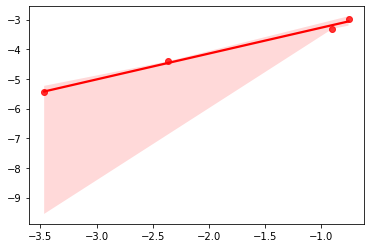

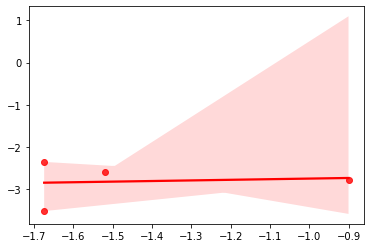

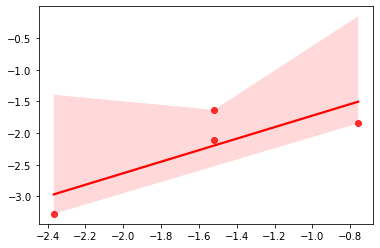

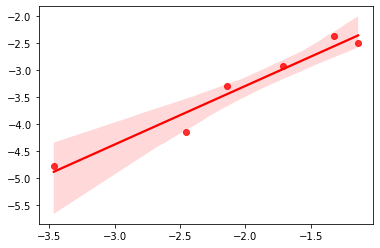

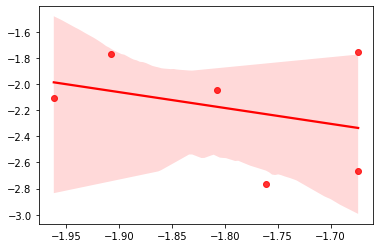

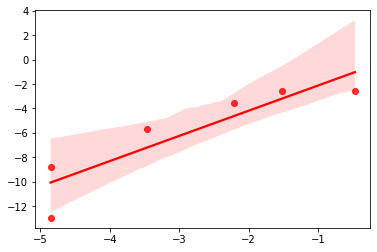

In [346]:
for data in datas:
  plt.figure()
  sns.regplot(np.log(rel_freq(data)), gaussian_anamorphose(data), color='red')

<font color='red' size=5>*2.2 Анаморфоза показательного распределения*

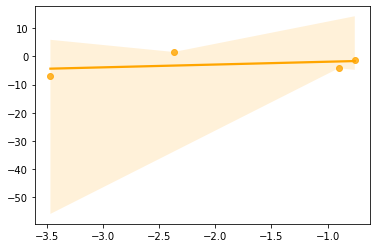

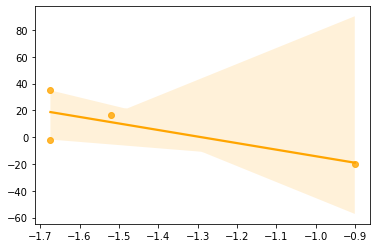

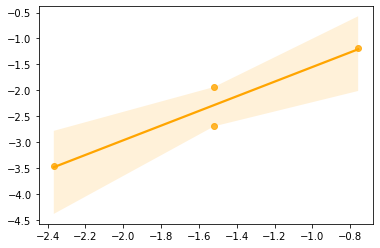

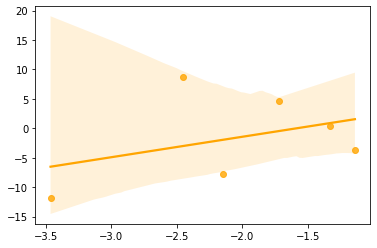

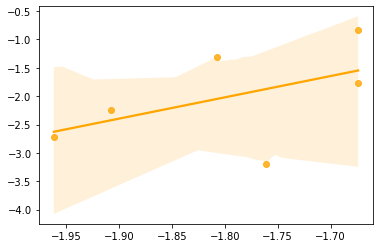

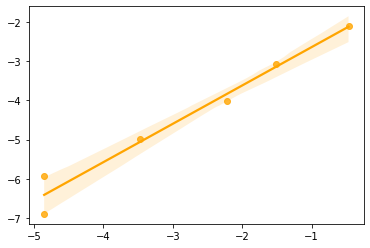

In [347]:
for data in datas:
  plt.figure()
  sns.regplot(np.log(rel_freq(data)), exponential_anamorphose(data), color='orange')
  

<font color='red' size=5>*2.3 Анаморфоза равномерного распределения*

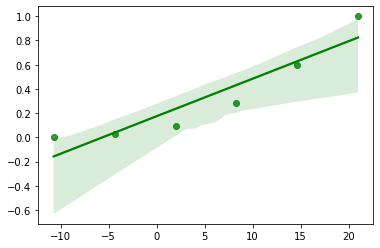

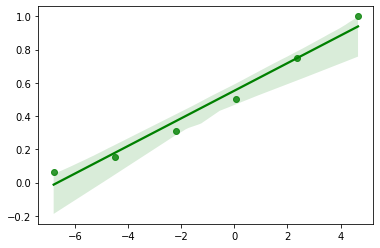

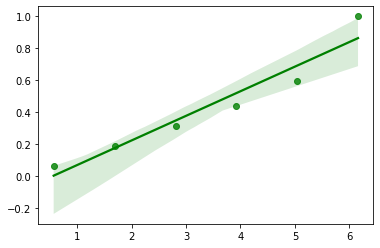

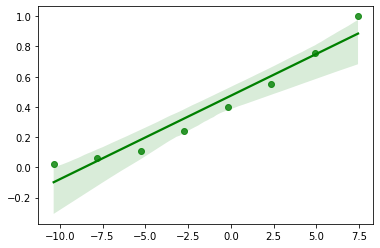

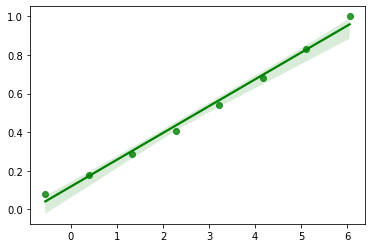

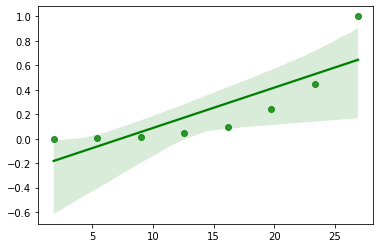

In [348]:
for data in datas:
  plt.figure()
  sns.regplot(uniform_anamorphose(data)[0], uniform_anamorphose(data)[1], color='green')

In [349]:
r2_scores = []
for data in datas:
  r2_scores.append(LinearRegression().fit(uniform_anamorphose(data)[0].reshape(-1, 1), uniform_anamorphose(data)[1].reshape(-1, 1)).score(uniform_anamorphose(data)[0].reshape(-1, 1), uniform_anamorphose(data)[1].reshape(-1, 1)))
print(f'Коэффициенты детерминации для равномерной анаморфозы:\n {r2_scores}')

Коэффициенты детерминации для равномерной анаморфозы:
 [0.8713088003054139, 0.9747403619677973, 0.9288659053655465, 0.9459701561858453, 0.9929108090204568, 0.6965234548835331]


In [350]:
print(f'Файлы с равномерным распределением: {np.argsort(r2_scores)[-2:] + 1}')

Файлы с равномерным распределением: [2 5]


In [351]:
x = np.array([np.log(rel_freq(data)) for data in datas])

In [352]:
y = np.array([exponential_anamorphose(data) for data in datas])

In [353]:
r2_scores = []
for data in datas:
  r2_scores.append(LinearRegression().fit(np.log(rel_freq(data)).reshape(-1, 1), exponential_anamorphose(data).reshape(-1, 1)).score(np.log(rel_freq(data)).reshape(-1, 1), exponential_anamorphose(data).reshape(-1, 1)))
print(f'Коэффициенты детерминации для показательной анаморфозы:\n {r2_scores}')

Коэффициенты детерминации для показательной анаморфозы:
 [0.11870295719170698, 0.5764067856025972, 0.8988299744282344, 0.1487613578423318, 0.25749274187914506, 0.9682913566623602]


In [354]:
print(f'Файлы с показательным распределением: {np.argsort(r2_scores)[-2:] + 1}')

Файлы с показательным распределением: [3 6]


In [355]:
r2_scores = []
for data in datas:
  r2_scores.append(LinearRegression().fit(np.log(rel_freq(data)).reshape(-1, 1), gaussian_anamorphose(data).reshape(-1, 1)).score(np.log(rel_freq(data)).reshape(-1, 1), gaussian_anamorphose(data).reshape(-1, 1)))
print(f'Коэффициенты детерминации для Гауссовской анаморфозы:\n {r2_scores}')

Коэффициенты детерминации для Гауссовской анаморфозы:
 [0.9923871109194303, 0.011215253738047548, 0.6655082394793226, 0.951068747544577, 0.1101407782090904, 0.8087653052243707]


In [356]:
print(f'Файлы с нормальным распределением: {np.argsort(r2_scores)[-2:] + 1}')

Файлы с нормальным распределением: [4 1]
